# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key
api_key = f'&APPID={api_key}'


#base url for API call
url = 'http://api.openweathermap.org/data/2.5/weather?q=' + api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
weather_url = 'http://api.openweathermap.org/data/2.5/weather?q=' 

#Create lists for the DF
New_Cities = []
Clouds = []
Dates = []
Humidities = []
Latitudes = []
Longitudes = []
Max_Temps = []
Wind_Speeds = []
Countries = []

#Set Counters
count_one = 0
set_one = 1

#Loops through to make DF columns & logger
for city in cities:
    try:
        response = requests.get(weather_url + city + api_key).json()
        Clouds.append(response['clouds']['all'])
        Countries.append(response['sys']['country'])
        Dates.append(response['dt'])
        Humidities.append(response['main']['humidity'])
        Latitudes.append(response['coord']['lat'])
        Longitudes.append(response['coord']['lon'])
        Max_Temps.append(response['main']['temp_max'])
        Wind_Speeds.append(response['wind']['speed'])
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            New_Cities.append(city)
        else:
            count_one += 1
            New_Cities.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | saint-philippe
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | koumac
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hanmer springs
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | tigil
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | tiznit
Processing Record 12 of Set 1 | lanivtsi
Processing Record 13 of Set 1 | canon city
Processing Record 14 of Set 1 | kirakira
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | knysna
Processing Record 17 of Set 1 | padang
Processing Record 18 of Set 1 | muroto
Processing Record 19 of Set 1 | port macquarie
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | hualmay
Processing Record 22 of Set 1 | abbeville
Processing Record 23 of Set 1 | cape town
Processing Record 24 of Set 1 | salalah
Proc

In [5]:
#Put max temps list into array
Max_Temps_array = np.asarray(Max_Temps)

#Convert max temps from Kelvin to Fahrenheight
Max_Temps_Fahr = (Max_Temps_array-273.15)*1.8 +32
Max_Temps_Fahr

array([ 73.976,  77.   ,  48.2  ,  51.8  ,  76.352,  63.05 ,  48.182,
        83.084,  33.35 ,  77.   ,  59.288,  53.312,  39.2  ,  80.654,
        47.174,  57.2  ,  78.62 ,  75.2  ,  80.996,  17.168,  58.082,
        57.2  ,  59.   ,  80.6  ,  37.994,  84.2  ,  42.8  ,  70.232,
        83.174,  56.534,  75.2  ,  68.792,  37.616,  73.4  ,  48.2  ,
        36.536,  64.994,  69.566,  63.05 ,  73.4  ,  84.2  ,  80.204,
        41.   ,  21.47 ,  46.4  ,  74.57 ,  64.832,  62.6  ,  80.6  ,
        57.992,  80.996,  30.2  ,  57.2  ,  91.4  ,  88.43 ,  65.03 ,
        65.534,  98.6  ,  95.216,  62.6  ,  38.714,  48.2  ,  44.006,
        51.548,  60.008,  84.2  ,  20.066,  57.2  ,  62.978,  86.   ,
        64.4  ,  49.172,  81.644,  56.282,  28.4  ,  47.462, 102.2  ,
        22.028,  44.132,  60.8  ,  45.32 ,  60.998,  60.17 ,  66.992,
        51.836,  12.614,  18.104,  21.29 ,  46.4  ,  51.998,  32.   ,
        45.86 ,  71.006,  69.998,  78.944,  53.996,  80.6  ,  35.006,
        65.822,  66.

In [6]:
#Create the DF
Weather_DF = pd.DataFrame({'City': New_Cities,
                           'Cloudiness': Clouds,
                           'Country': Countries,
                           'Date' : Dates,
                           'Humidity': Humidities,
                           'Lat': Latitudes,
                           'Lng': Longitudes,
                           'Max Temp': Max_Temps_Fahr,
                           'Wind Speed': Wind_Speeds})

#Preview DF
Weather_DF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,31,PF,1571108248,82,-23.12,-134.97,73.976,4.050
1,avarua,70,CK,1571108248,69,-21.21,-159.78,77.000,6.200
2,saint-philippe,40,CA,1571108248,66,45.36,-73.48,48.200,2.552
3,albany,75,US,1571108249,61,42.65,-73.75,51.800,1.733
4,koumac,0,NC,1571108249,39,-20.56,164.28,76.352,4.582


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
Weather_DF.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [8]:
#Print output data to csv
Weather_DF.to_csv(output_data_file, index_label= 'City_ID')

Weather_DF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,31,PF,1571108248,82,-23.12,-134.97,73.976,4.050
1,avarua,70,CK,1571108248,69,-21.21,-159.78,77.000,6.200
2,saint-philippe,40,CA,1571108248,66,45.36,-73.48,48.200,2.552
3,albany,75,US,1571108249,61,42.65,-73.75,51.800,1.733
4,koumac,0,NC,1571108249,39,-20.56,164.28,76.352,4.582


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

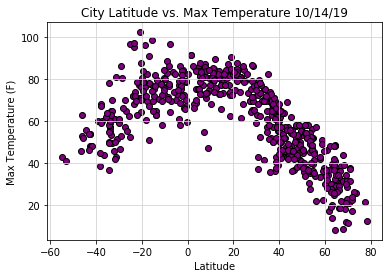

In [9]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Max Temp"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Max Temperature "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

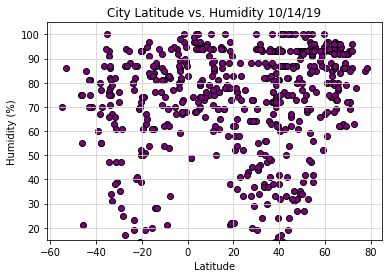

In [10]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

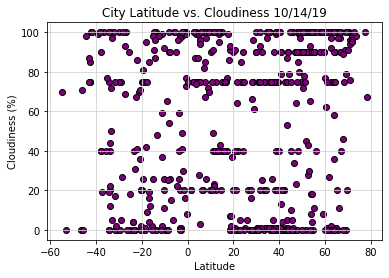

In [11]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

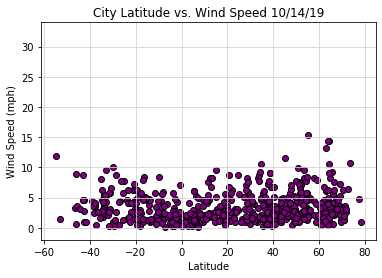

In [12]:
plt.scatter(Weather_DF["Lat"],Weather_DF["Wind Speed"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Wind Speed "+ time.strftime('%x'))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()
